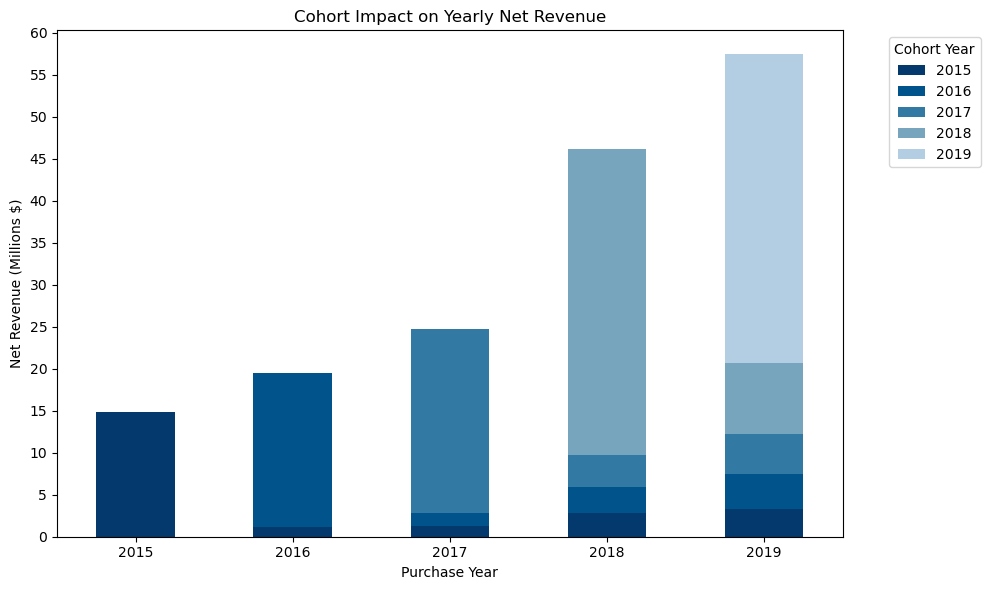

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

# ---- Load CSV ----
df = pd.read_csv(r'Resources\cohort_analysis.csv')

# Ensure numeric types
df["cohort_year"] = df["cohort_year"].astype(int)
df["purchase_year"] = df["purchase_year"].astype(int)

# ---- Pivot for stacked bar chart ----
customer_pivot = df.pivot(index="cohort_year", columns="purchase_year", values="number_of_customers").fillna(0)
revenue_pivot = df.pivot(index="purchase_year", columns="cohort_year", values="net_revenue").fillna(0)

# # ---- Plot: Customers ----
# customer_pivot.plot(
#     kind="bar",
#     stacked=True,
#     figsize=(10, 6),
#     colormap="tab20"
# )
# plt.title("Cohort Analysis - Number of Customers")
# plt.xlabel("Cohort Year")
# plt.ylabel("Number of Customers")
# plt.legend(title="Purchase Year", bbox_to_anchor=(1.05, 1), loc="upper left")
# plt.tight_layout()
# plt.show()

# ---- Scale to millions ----
revenue_pivot_million = revenue_pivot / 1000000  # Convert to millions

# ---- Custom blue gradient (dark to light) ----
colors = ["#03396c", "#005b96", "#6497b1", "#b3cde3"]
custom_blues = LinearSegmentedColormap.from_list("custom_blues", colors, N=len(revenue_pivot_million.columns))

# ---- Plot: Revenue ----
ax = revenue_pivot_million.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    colormap=custom_blues
)
plt.title("Cohort Impact on Yearly Net Revenue")
plt.xlabel("Purchase Year")
plt.ylabel("Net Revenue (Millions $)")

# Custom y-axis ticks: 0, 5, 10, ...
max_val = revenue_pivot_million.sum(axis=1).max()
plt.yticks(np.arange(0, max_val + 5, 5))
plt.xticks(rotation=0)
plt.legend(title="Cohort Year", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


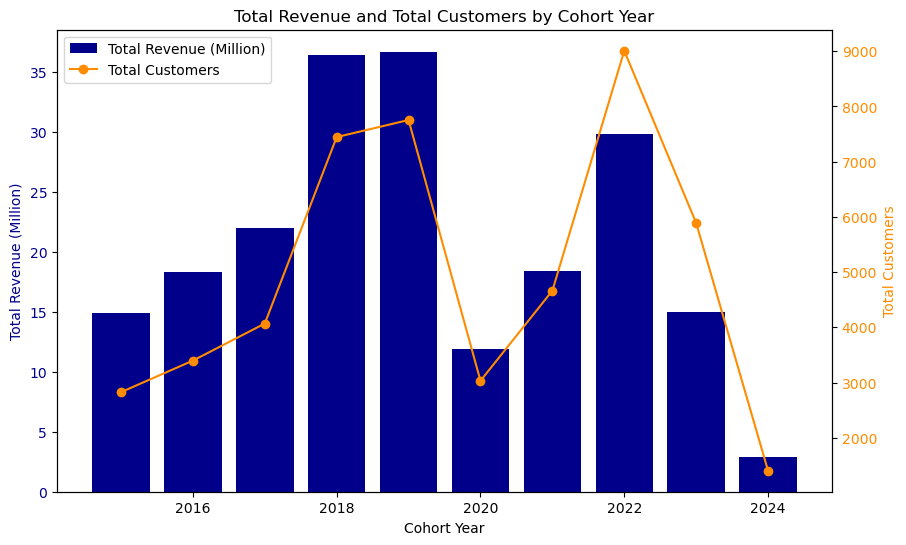

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
df = pd.read_csv(r'Resources\cohort_analysis_2.csv')  # Replace with your actual filename

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for total revenue (convert to millions)
ax1.bar(df["cohort_year"], df["total_revenue"] / 1_000_000, color='darkblue', label='Total Revenue (Million)')
ax1.set_xlabel("Cohort Year")
ax1.set_ylabel("Total Revenue (Million)", color='darkblue')
ax1.tick_params(axis='y', labelcolor='darkblue')

# Second y-axis for total customers line plot
ax2 = ax1.twinx()
ax2.plot(df["cohort_year"], df["total_customers"], color='darkorange', marker='o', label='Total Customers')
ax2.set_ylabel("Total Customers", color='darkorange')
ax2.tick_params(axis='y', labelcolor='darkorange')

# Title and combined legend
plt.title("Total Revenue and Total Customers by Cohort Year")
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.show()


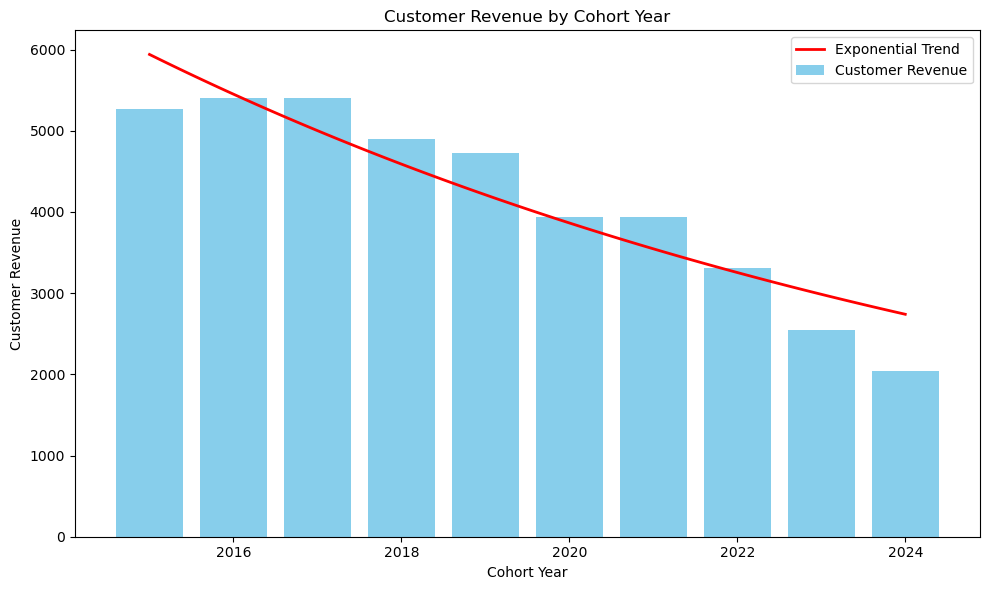

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load data from CSV (assuming it's saved as 'cohort_data.csv')
df = pd.read_csv(r'Resources\cohort_analysis_2.csv')

# Convert columns to proper numeric types if needed
df["cohort_year"] = df["cohort_year"].astype(int)
df["customer_revenue"] = df["customer_revenue"].astype(float)

# Define exponential function for curve fitting: y = a * exp(b * x)
def exp_func(x, a, b):
    return a * np.exp(b * x)

# Use cohort_year as x (convert to numeric sequence starting from 0 for stability)
x_data = np.arange(len(df))
y_data = df["customer_revenue"].values

# Fit exponential curve to data
params, covariance = curve_fit(exp_func, x_data, y_data, p0=(y_data[0], 0.1))

# Generate fitted y-values for the smooth trend line
x_fit = np.linspace(0, len(df) - 1, 100)
y_fit = exp_func(x_fit, *params)

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(df["cohort_year"], y_data, color="skyblue", label="Customer Revenue")

# Plot exponential trend line
plt.plot(df["cohort_year"].iloc[0] + x_fit, y_fit, color="red", linewidth=2, label="Exponential Trend")

plt.xlabel("Cohort Year")
plt.ylabel("Customer Revenue")
plt.title("Customer Revenue by Cohort Year")
plt.legend()
plt.tight_layout()
plt.show()

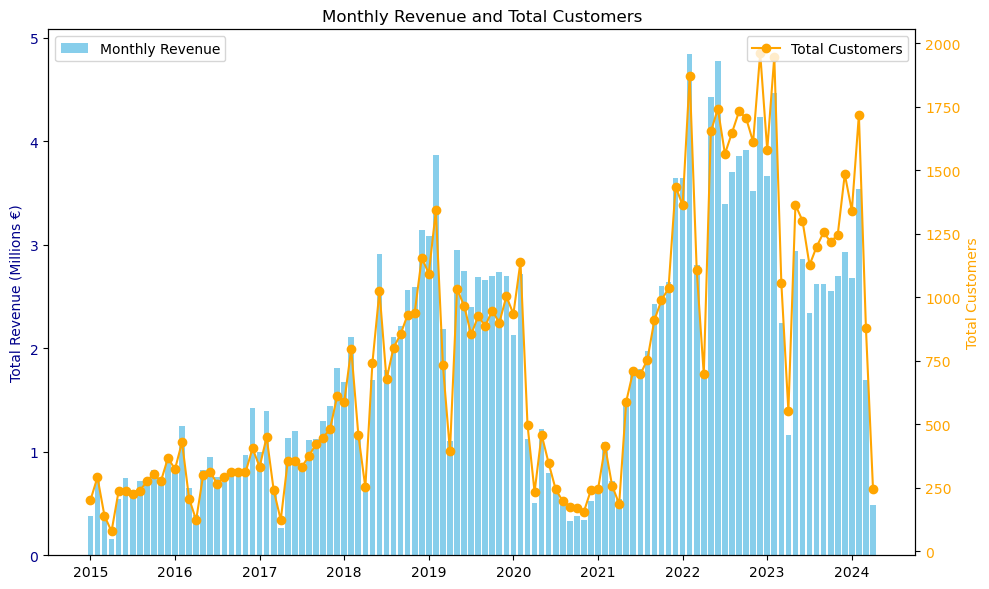

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv(r'Resources\cohort_analysis_3.csv')

# Ensure the year_month column is treated as datetime for sorting
df['year_month'] = pd.to_datetime(df['year_month'], format='%Y-%m')

# Sort in case the CSV isn't ordered
df.sort_values('year_month', inplace=True)

# Convert revenue to millions
df['total_revenue_m'] = df['total_revenue'] / 1_000_000

# Create the figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for monthly revenue (left Y-axis)
ax1.bar(df['year_month'].dt.strftime('%Y-%m'), df['total_revenue_m'], color='skyblue', label='Monthly Revenue')
ax1.set_ylabel('Total Revenue (Millions €)', color='darkblue')
ax1.tick_params(axis='y', labelcolor='darkblue')

# Create a second axis for total customers (right Y-axis)
ax2 = ax1.twinx()
ax2.plot(df['year_month'].dt.strftime('%Y-%m'), df['total_customers'], color='orange', marker='o', label='Total Customers')
ax2.set_ylabel('Total Customers', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Show only the year on the x-axis
ax1.set_xticks(range(0, len(df), 12))
ax1.set_xticklabels(df['year_month'].dt.year[::12])

# Titles and layout
plt.title('Monthly Revenue and Total Customers')
fig.autofmt_xdate(rotation=0,ha='center')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


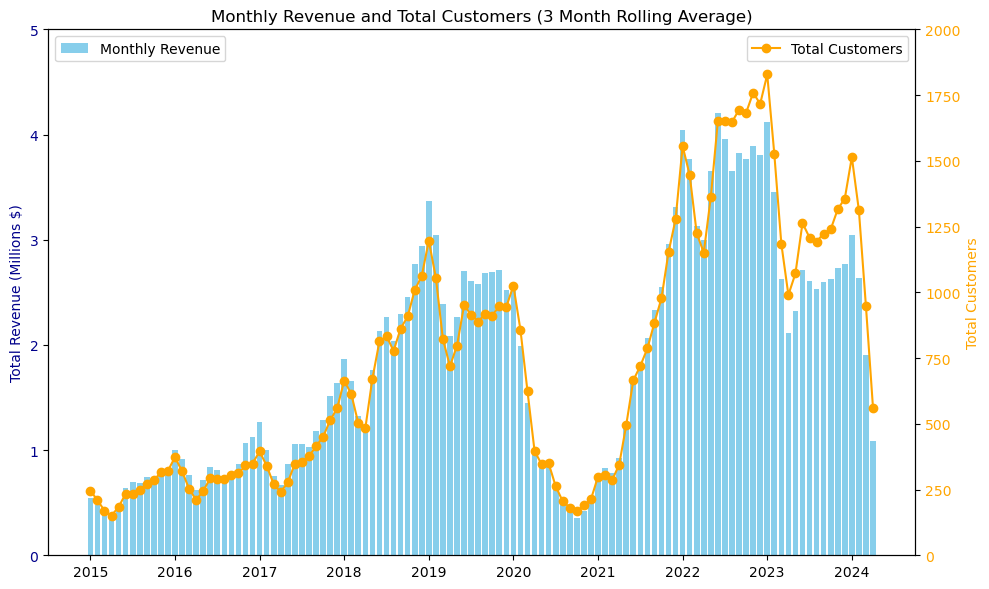

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv(r'Resources\cohort_rolling.csv')

# Ensure the year_month column is treated as datetime for sorting
df['year_month'] = pd.to_datetime(df['year_month'], format='%Y-%m')

# Sort in case the CSV isn't ordered
df.sort_values('year_month', inplace=True)

# Convert revenue to millions
df['total_revenue_m'] = df['total_revenue'] / 1_000_000

# Create the figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for monthly revenue (left Y-axis)
ax1.bar(df['year_month'].dt.strftime('%Y-%m'), df['total_revenue_m'], color='skyblue', label='Monthly Revenue')
ax1.set_ylabel('Total Revenue (Millions $)', color='darkblue')
ax1.set_ylim(0, 5)
ax1.tick_params(axis='y', labelcolor='darkblue')

# Create a second axis for total customers (right Y-axis)
ax2 = ax1.twinx()
ax2.plot(df['year_month'].dt.strftime('%Y-%m'), df['total_customers'], color='orange', marker='o', label='Total Customers')
ax2.set_ylabel('Total Customers', color='orange')
ax2.set_ylim(0, 2000)
ax2.tick_params(axis='y', labelcolor='orange')

# Show only the year on the x-axis
ax1.set_xticks(range(0, len(df), 12))
ax1.set_xticklabels(df['year_month'].dt.year[::12])

# Titles and layout
plt.title('Monthly Revenue and Total Customers (3 Month Rolling Average)')
fig.autofmt_xdate(rotation=0,ha='center')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


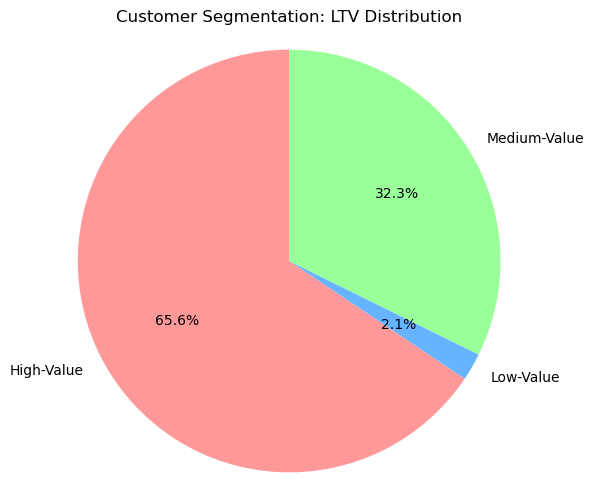

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV file
df = pd.read_csv(r'Resources\1_customer_segmentation.csv')

# Extract labels and values
labels = df['level']
sizes = df['ltv_percentage']

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',    # Show percentages on chart
    startangle=90,        # Start at 12 o'clock
    colors=['#ff9999', '#66b3ff', '#99ff99']  # Custom colors
)
plt.title("Customer Segmentation: LTV Distribution")
plt.axis('equal')  # Equal aspect ratio to make pie circular
plt.show()


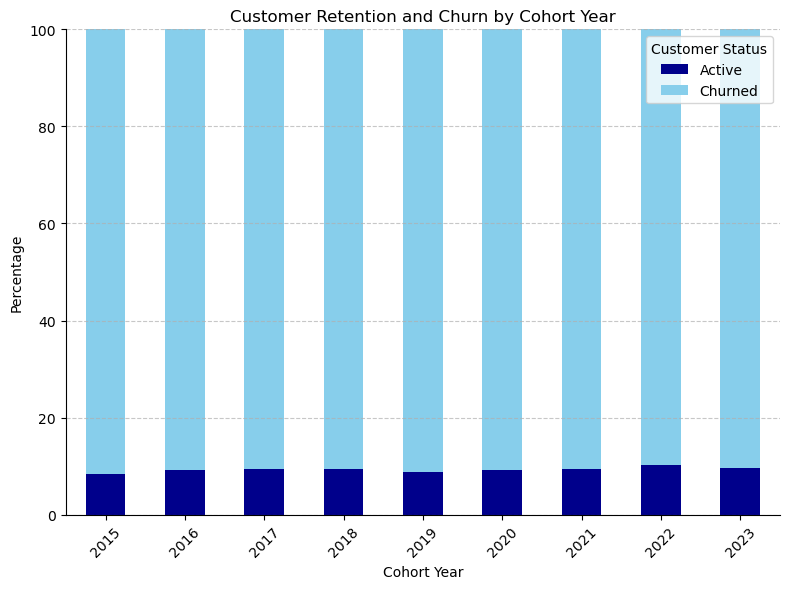

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Read CSV
df = pd.read_csv(r'Resources\3_customer_retention.csv')

# Pivot data so 'Active' and 'Churned' become columns
pivot_df = df.pivot(index='cohort_year', columns='customer_status', values='percentage_of_cohort')

# Ensure proper ordering by year
pivot_df = pivot_df.sort_index()

# Plot stacked bar chart
ax = pivot_df.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 6),
    color={'Active': 'darkblue', 'Churned': 'skyblue'}
)
sns.despine()
# Labels and title
plt.title("Customer Retention and Churn by Cohort Year")
plt.xlabel("Cohort Year")
plt.ylabel("Percentage")
plt.legend(loc='upper right',title="Customer Status")
plt.ylim(0, 100)  # since percentages
plt.xticks(rotation=45)
plt.tight_layout()
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
